In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### set default plot params: rcParams[] ###
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 16.0)  #plot size
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#### below 2 lines to let IPython auto reload all the changes ###
%load_ext autoreload
%autoreload 2

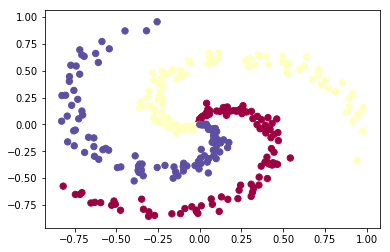

In [2]:
### generate spiral dataset -- which cannot be easily linearly separable
N = 100 # num of points per class
D = 2   # dimension (X, Y coordinates only)
K = 3   # num of classes (types)

X = np.zeros((N*K,D)) # matrix input -- ROW = N*K;  COL=D
Y = np.zeros(N*K, dtype='uint8') #unsigned integer (0-255)

for j in np.arange(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) #radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  #theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)] #concate sin(t) array with cos(t) to array
                                            #np.c_[[1,2],[a,b]] => [[1,a],[2,b]]
    Y[ix] = j # one dimension [0.....0,1.....1,2.....2] --> as color sequence

plt.scatter(x=X[:,0], y=X[:,1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
##### train a neural network -- one hidden layer
h = 100  # size of the hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1,K))

step_size = 1e-0
reg = 1e-3

num_examples = X.shape[0]
for i in range(10000):
    hidden_layer = np.maximum(0, np.dot(X, W) + b)   ## max(0, X*W+b)
    scores = np.dot(hidden_layer, W2) + b2  
    exp_scores = np.exp(scores) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_logprobs = -np.log(probs[range(num_examples), Y])
    
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    
    if i % 1000 == 0:
        print("iteration %d: loss %f"%(i,loss))
        
    # gradient
    dscores = probs
    dscores[range(num_examples), Y] -= 1
    dscores /= num_examples
    
    # back propagate
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    
    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0
    
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True) # just use sum to convert to scalar
    
    dW2 += reg * W2
    dW += reg * W
    
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

    

iteration 0: loss 1.098385
iteration 1000: loss 0.364575
iteration 2000: loss 0.277903
iteration 3000: loss 0.265330
iteration 4000: loss 0.251886
iteration 5000: loss 0.249175
iteration 6000: loss 0.248505
iteration 7000: loss 0.248200
iteration 8000: loss 0.247938
iteration 9000: loss 0.247511


In [4]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)   ## max(0, X*W+b)
scores = np.dot(hidden_layer, W2) + b2 
predicted_class = np.argmax(scores, axis=1) ## argmax -- maxi value of the function in each 'class'
print("training accuracy: %.2f"%(np.mean(predicted_class == Y)))

training accuracy: 0.98


(-1.8558489529998803, 1.944151047000123)

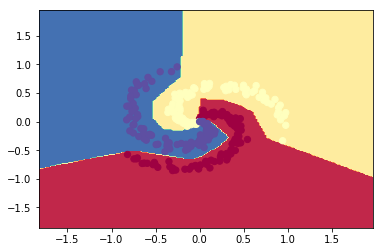

In [7]:
## visual
h = 0.02
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_hidden = np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b)
Z = np.dot(Z_hidden, W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=1)
plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())